In [ ]:
'''

Instructions:

1.) Install the following libraries: `requests`, `matplotlib`.

2.) Use `requests` to track the location of the International Space Station. 
Generate at least 100 data points with the latitude, longitude, and timestamp of the data point. 
You may do this by pinging this  API once every 10 seconds for 17 or so minutes.

3.) Use `matplotlib` to illustrate the path of the ISS. Use any visualization you feel is appropriate.

'''

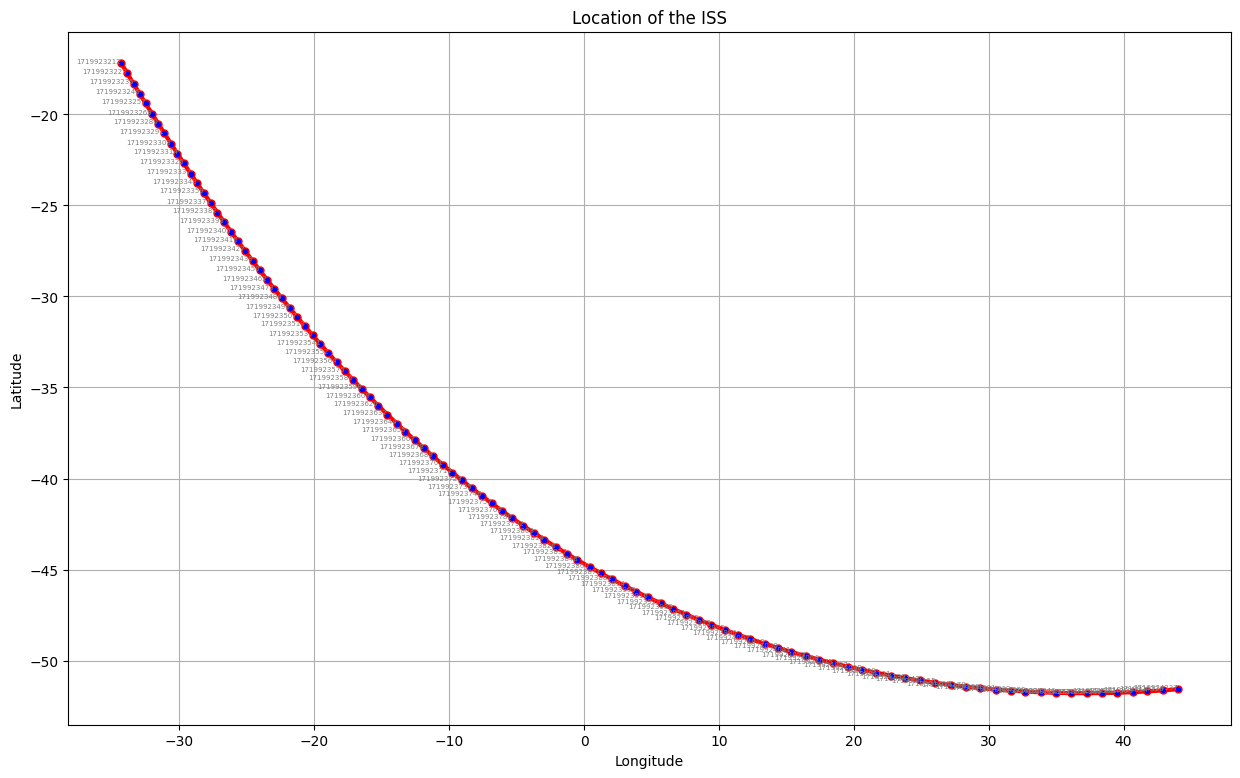

In [3]:
#importing the needed libraries
import requests #for the url
import time #for the for loop intervals
import matplotlib.pyplot as plt #for the graph

#initiate empty lists to store the coordinates
timestamp_list = []
longitude_list = []
latitude_list = []

#make a for loop in order to get the coordinates
for i in range(100):
    
    #open the url and use it as json table for each refresh w/in the loop
    link = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    coordinate_table = link.json()

    #getting coordinates
    timestamp = coordinate_table['timestamp']
    longitude = coordinate_table['longitude']
    latitude = coordinate_table['latitude']

    #adding these coordinates to the table
    timestamp_list.append(timestamp)
    longitude_list.append(longitude)
    latitude_list.append(latitude)

    #controlling the for loop intervals
    time.sleep(10)

#make the graph
plt.figure(figsize=(15,9))
plt.plot(longitude_list,latitude_list, color = 'r', linestyle='-', linewidth = 3, marker='o', markerfacecolor='blue', markersize = 5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Location of the ISS")
plt.grid(True)

#using for loop, to add labels to the data points
#using zip so it goes through each list in sync
for lo, la, t in zip(longitude_list, latitude_list, timestamp_list):
    plt.text(lo, la, t, fontsize = 5, ha = 'right', color = 'gray') #setting conditions for the labels
    

#show the graph
plt.show()
